# Test Uniform, Default and He Initialization on MNIST Dataset with Relu Activation


In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline
torch.manual_seed(0)

In [2]:
class Net_He(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_He, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity="relu")
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for l, linear_transform in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [3]:
class Net_Uniform(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for l, linear_transform in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)

        return x

In [4]:
class Net(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)

    def forward(self, x):
        L = len(self.hidden)
        for l, linear_transform in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)

        return x

In [5]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    loss_accuracy = {"training_loss": [], "validation_accuracy": []}

    # n_epochs
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy["training_loss"].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy["validation_accuracy"].append(accuracy)

    return loss_accuracy

In [6]:
train_dataset = dsets.MNIST(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)
validation_dataset = dsets.MNIST(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)

In [7]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=2000, shuffle=True
)
validation_loader = torch.utils.data.DataLoader(
    dataset=validation_dataset, batch_size=5000, shuffle=False
)

In [8]:
input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 200, 100, output_dim]

In [9]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01

In [10]:
model = Net(layers)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(
    model, criterion, train_loader, validation_loader, optimizer, epochs=30
)

In [11]:
model_He = Net_He(layers)
optimizer = torch.optim.SGD(model_He.parameters(), lr=learning_rate)
training_results_He = train(
    model_He, criterion, train_loader, validation_loader, optimizer, epochs=30
)

In [12]:
model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(
    model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=30
)

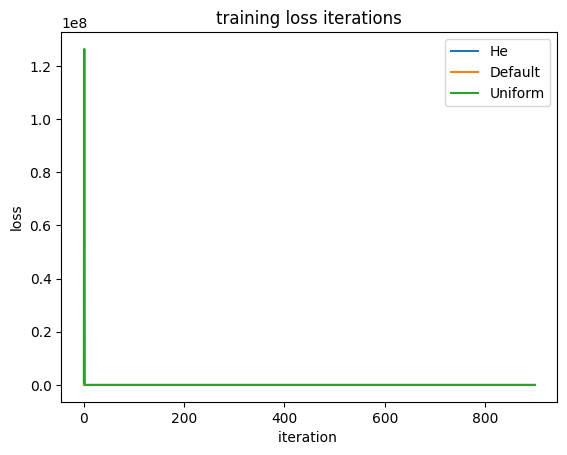

In [13]:
# Plot the loss

plt.plot(training_results_He["training_loss"], label="He")
plt.plot(training_results["training_loss"], label="Default")
plt.plot(training_results_Uniform["training_loss"], label="Uniform")
plt.ylabel("loss")
plt.xlabel("iteration ")
plt.title("training loss iterations")
plt.legend()

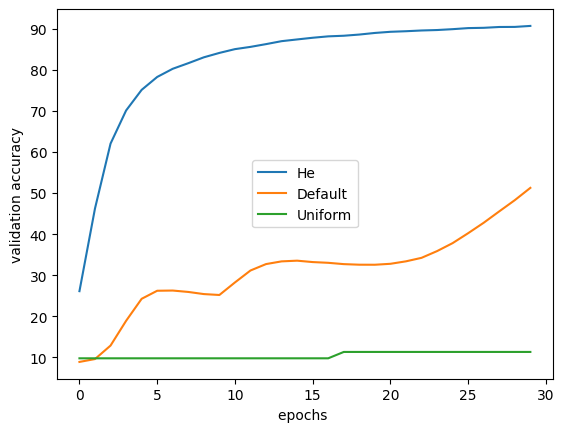

In [14]:
# Plot the accuracy

plt.plot(training_results_He["validation_accuracy"], label="He")
plt.plot(training_results["validation_accuracy"], label="Default")
plt.plot(training_results_Uniform["validation_accuracy"], label="Uniform")
plt.ylabel("validation accuracy")
plt.xlabel("epochs ")
plt.legend()
plt.show()